In [1]:
#this notebook is for code testing

In [2]:
import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import cartopy.crs as ccrs
import cmocean as cm
from collections import OrderedDict
import cftime
import glob

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client
import matplotlib.path as mpath

In [3]:
client = Client(n_workers=8)
client

Client Scheduler: tcp://127.0.0.1:43023 Dashboard: /proxy/46087/status,Cluster Workers: 8 Cores: 8 Memory: 100.00 GiB


In [4]:
session = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')

In [5]:
from cosima_cookbook import explore
dbx = explore.DatabaseExplorer #(session=session)
dbx

cosima_cookbook.explore.DatabaseExplorer

In [6]:
ee = explore.ExperimentExplorer(session=session, experiment='01deg_jra55v140_iaf')
ee

ExperimentExplorer(children=(HTML(value='\n            <h3>Experiment Explorer</h3>\n\n            <p>Select a…

In [6]:
#cc.querying.get_experiments(session)

In [7]:
import cartopy.feature as cft
land_50m = cft.NaturalEarthFeature('physical', 'land', '50m',
                                   edgecolor='black', facecolor='gray', linewidth=0.5)

In [8]:
expt='01deg_jra55v140_iaf'
variable='ht'
ht = cc.querying.getvar('01deg_jra55v140_iaf','ht',session,n=1).sel(yt_ocean=slice(-90,-55))
#ht = cc.querying.getvar(expt,variable,session, n=-1).fillna(1.0).astype(int) - 1
ht.load()
print(ht.shape)

variable='hu'
hu = cc.querying.getvar(expt,variable,session, n=-1).fillna(1.0).astype(int) - 1
hu.load()
print(hu.shape)

(584, 3600)
(2700, 3600)


In [9]:
expt='01deg_jra55v140_iaf'
variable='xt_ocean'
xt_ocean = cc.querying.getvar(expt,variable,session, n=-1).fillna(1.0).astype(int) - 1
xt_ocean.load()
print(xt_ocean.shape)

expt='01deg_jra55v140_iaf'
variable='yt_ocean'
yt_ocean = cc.querying.getvar(expt,variable,session, n=-1).fillna(1.0).astype(int) - 1
yt_ocean.load()
print(yt_ocean.shape)

variable='area_t'
area_t = cc.querying.getvar(expt,variable,session, n=-1).fillna(1.0).astype(int) - 1
area_t.load()
print(area_t.shape)

variable='xu_ocean'
xu_ocean = cc.querying.getvar(expt,variable,session, n=-1).fillna(1.0).astype(int) - 1
xu_ocean.load()
print(xu_ocean.values)

variable='yu_ocean'
yu_ocean = cc.querying.getvar(expt,variable,session, n=-1).fillna(1.0).astype(int) - 1
yu_ocean.load()
print(yu_ocean.shape)

variable='area_u'
area_u = cc.querying.getvar(expt,variable,session, n=-1).fillna(1.0).astype(int) - 1
area_u.load()
print(area_u.shape)

(3600,)
(2700,)
(2700, 3600)
[-280 -280 -280 ...   78   78   79]
(2700,)
(2700, 3600)


In [ ]:
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('Advective GMOC')
clev = np.arange(-30,32,2)

Ocean_File = os.path.join(NYFCntrlDir,'cntrl.gmoc_net.15.nc')#cntrl.ocean.*.ncra.nc')
cntrl=xr.open_dataset(Ocean_File,engine='netcdf4',decode_times=False)
print cntrl.gmoc_net

a=cntrl.gmoc_net.mean(dim='Time')

plt.subplot(421)
plt.contourf(yu_ocean,potrho,a,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,potrho,a,levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,potrho,a,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.2,1036))
plt.ylabel('Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$)')
plt.xlim([-75,60])
plt.title('GMOC CNTR')

NameError: name 'land_50m' is not defined

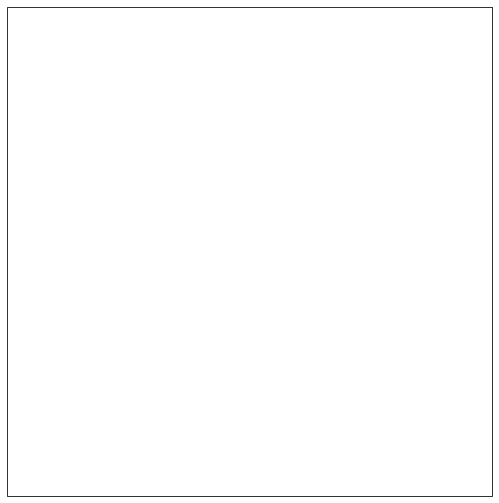

In [5]:
projection=ccrs.SouthPolarStereo()

fig = plt.figure(figsize=(10, 9))
#plt.suptitle('IAF Cycle 1, Big El Nino\'s Temp Anomaly at 200 m')

ax = plt.subplot(1, 1, 1, projection=projection)

ax.set_extent([-280, 80, -80, -55], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

#anom=temp.where(tmask.tmask).sel(st_ocean=(200,700)).mean(dim='st_ocean')
#t=temp.isel(st_ocean=0)

p2 = ht.plot.contour(ax=ax,
                       x='xt_ocean', y='yt_ocean', levels=2, vmin=999, vmax=1002, colors='k',linewidth=1,
                       transform=ccrs.PlateCarree())

#p3=ax.quiver(xt_ocean.values, yt_ocean.values, tx73.values-decavg73_tx.values, ty73.values-decavg73_ty.values,color='g',headwidth=6,regrid_shape=25,transform=ccrs.PlateCarree())

plt.title('Mask LTM Zavg Temp')

ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1,cax=ax_cb, orientation='vertical', extend='both')
cb.ax.set_xlabel('°C');



In [7]:
#get decadal average around 15/16 event ... something wrong with the time dimension ...
start = '2008-01-01 00:00:00'
end = '2018-01-01 00:00:00'
decavg16_cyc1_temp = cc.querying.getvar(expt='01deg_jra55v140_iaf', variable='temp', 
                       session=session, frequency='1 monthly',ncfile="%monthly-mean%"
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).mean('time')
decavg16_cyc1_temp.shape

(2700, 3600)


In [11]:
s = '-01-01 00:00:00'
e = '-01-02 00:00:00'

for yr in range(2000,2001):
    start = str(yr)+s
    end = str(yr)+e
    print(start,end)
    
    u = cc.querying.getvar(expt='01deg_jra55v140_iaf', variable='u', 
                       session=session, frequency='1 daily',
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).chunk({'st_ocean':75, 'yu_ocean':540, 'xu_ocean':720})
    
    print(u.shape)
    

2000-01-01 00:00:00 2000-01-02 00:00:00
(1, 75, 2700, 3600)


In [13]:
ubot = u.isel(st_ocean=kmu)

In [14]:
print(ubot.shape)

(1, 2700, 3600)


In [16]:
ubot.to_netcdf(path='/g/data/v45/pas561/mom/archive/ubot_om2_01jraiaf/ubot_tst.nc')

In [ ]:
%%time
s = '-01 00:00:00'
e = '-01 00:00:00'

for yr in range(2000,2001):
    for mth in range(1,2):
        if (mth) < 9:
            start = str(yr)+'-0'+str(mth)+s
            end = str(yr)+'-0'+str(mth+1)+s
        elif(mth) < 10:
            start = str(yr)+'-0'+str(mth)+s
            end = str(yr)+'-'+str(mth+1)+s
        elif(mth) < 12:
            start = str(yr)+'-'+str(mth)+s
            end = str(yr)+'-'+str(mth+1)+s
        elif(mth) > 11:
            start = str(yr)+'-'+str(mth)+s
            end = str(yr+1)+'-0'+str(1)+s
        
        print(start,end)
        
        u = cc.querying.getvar(expt='01deg_jra55v140_iaf', variable='u', 
                       session=session, frequency='1 daily',
                       start_time=start, 
                       end_time=end).sel(time=slice(start,end)).chunk({'st_ocean':75, 'yu_ocean':540, 'xu_ocean':720})
    
        print(u.shape)
        
        ubot = u.isel(st_ocean=kmu)
        print(ubot.shape)
        
        ubot.to_netcdf(path='/g/data/v45/pas561/mom/archive/ubot_om2_01jraiaf/ubot_tst2.nc')
        
    

2000-01-01 00:00:00 2000-02-01 00:00:00
(31, 75, 2700, 3600)


distributed.utils_perf - WARNING - full garbage collections took 35% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 36% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 36% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 39% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 53% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 58% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 65% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 71% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 80% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took